In [1]:
import pandas as pd
import os

## Output analysis and evaluation

Metrics to calculate:

- **Label flip score:** the percentage of the time the counterfactual flips the output of the classifier.
    - You can calculate this easily using the found flip column.
-  **Fraction of tokens changed:** the average fraction of tokens that are changed in the input when generating the counterfactual.
    - Calculate this using the frac_tokens_same column.
- **Perplexity:** the perplexity score of the generated counterfactual (lower is better)
    - Calculate the average perplexity for the original and counterfactual text.

In [2]:
%pwd

'/Users/smcaleese/Documents/masters-thesis-code/analysis'

In [32]:
def calculate_perplexity_score(counterfactual_perplexity, original_perplexity):
    ratio = counterfactual_perplexity / original_perplexity
    score = 1 - (ratio - 1)
    return round(score, 3)

def calculate_metrics(df, precision=3):
    """Calculate and round metrics from the given DataFrame."""
    metrics = {
        "label_flip_score": df["found_flip"].mean(),
        "mean_fraction_tokens_same": df["frac_tokens_same"].mean(),
        "perplexity_score": calculate_perplexity_score(df["counterfactual_perplexity"].mean(), df["original_perplexity"].mean())
    }
    return {key: round(value, precision) for key, value in metrics.items()}

def min_max_normalize(arr):
    """Perform min-max normalization on the given array."""
    min_val, max_val = min(arr), max(arr)
    return [(x - min_val) / (max_val - min_val) for x in arr]

def process_csv_files(directory):
    """Process all CSV files in the given directory and return collected data."""
    data = {
        "method_name": [],
        "label_flip_score": [],
        "mean_fraction_tokens_same": [],
        "perplexity_score": [],
    }

    for file in os.listdir(directory):
        if file.endswith(".csv"):
            method_name = file.split("-")[0]
            data["method_name"].append(method_name)
            print(f"Processing method: {method_name}")
            
            df = pd.read_csv(os.path.join(directory, file))
            metrics = calculate_metrics(df)
            for key in metrics:
                data[key].append(metrics[key])

    return data


In [33]:
output_dir = "../output"

# Collect data from the CSV files
data = process_csv_files(output_dir)

# Display the final dataframe
df = pd.DataFrame(data).set_index("method_name")
df.head()

Processing method: closs
Processing method: polyjuice
Processing method: hotflip


,label_flip_score,mean_fraction_tokens_same,perplexity_score
method_name,,,
closs,0.82,0.274,0.640
polyjuice,0.26,0.434,0.725
hotflip,0.57,0.268,0.940


## Create bar chart

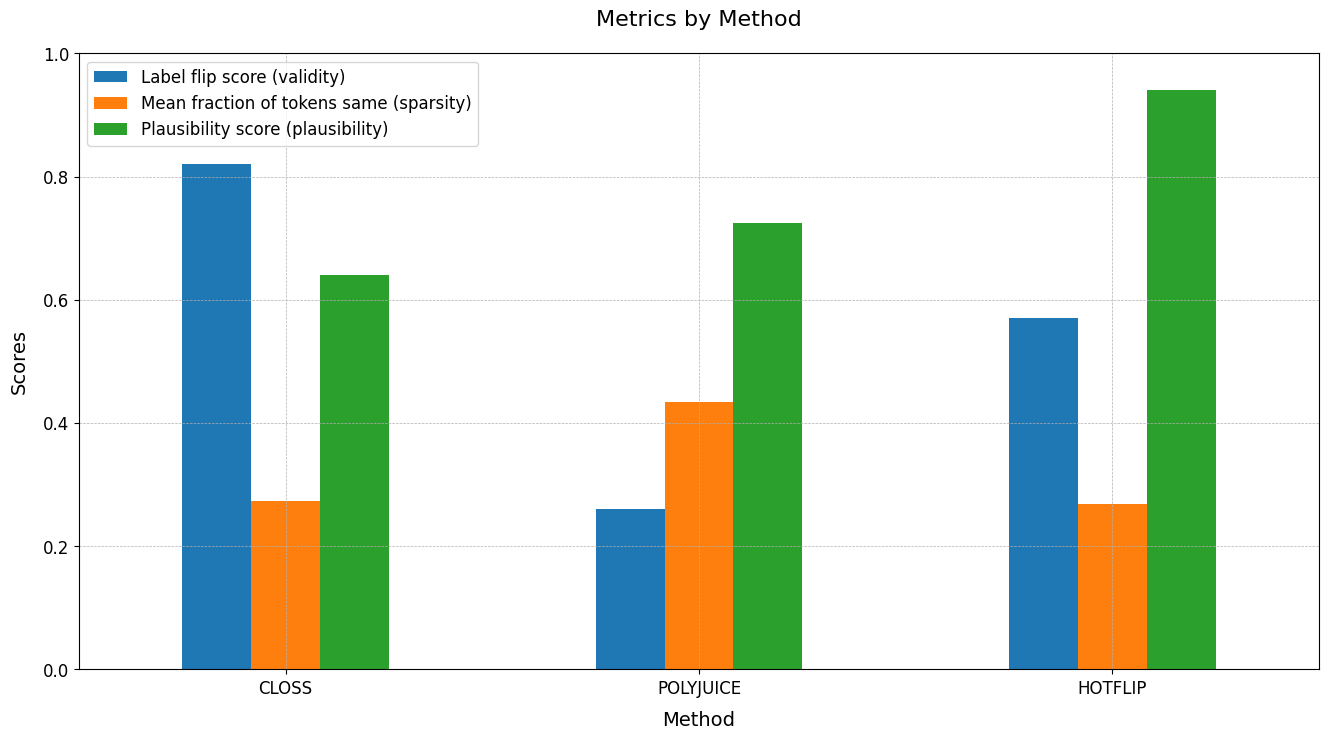

In [40]:
import matplotlib.pyplot as plt

# plt.style.use('ggplot')
plt.style.use('default')

ax = df.plot.bar(figsize=(16, 8), fontsize=12)
ax.set_title('Metrics by Method', fontsize=16, pad=20)

ax.set_xlabel('Method', fontsize=14, labelpad=10)
ax.set_xticklabels(df.index.str.upper(), rotation=0, ha='center', fontsize=12)

ax.set_ylabel('Scores', fontsize=14, labelpad=10)
ax.set_ylim([0, 1])

ax.legend(labels=["Label flip score (validity)", "Mean fraction of tokens same (sparsity)", "Plausibility score (plausibility)"], fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.savefig("results.png", dpi=300)

In [6]:
import pandas as pd
import plotly.graph_objects as go

# Load the data from the CSV file
df = pd.read_csv('data.csv')

# Ensure the method_name column is used as the index
df.set_index('method_name', inplace=True)

# Create a grouped bar chart using plotly
fig = go.Figure()

# Add bars for each metric
fig.add_trace(go.Bar(
    x=df.index,
    y=df['label_flip_score'],
    name='Label Flip Score',
    marker_color='#1f77b4'
))

fig.add_trace(go.Bar(
    x=df.index,
    y=df['mean_fraction_tokens_same'],
    name='Mean Fraction Tokens Same',
    marker_color='#ff7f0e'
))

fig.add_trace(go.Bar(
    x=df.index,
    y=df['mean_inverted_counterfactual_perplexity'],
    name='Mean Inverted Counterfactual Perplexity',
    marker_color='#2ca02c'
))

# Update layout for better appearance
fig.update_layout(
    title='Comparison of Metrics by Method',
    xaxis=dict(
        title='Method',
        tickvals=df.index,
        ticktext=df.index.str.upper()
    ),
    yaxis=dict(
        title='Scores'
    ),
    barmode='group',
    legend_title_text='Metrics',
    template='seaborn'
)

# Show the plot
fig.show()


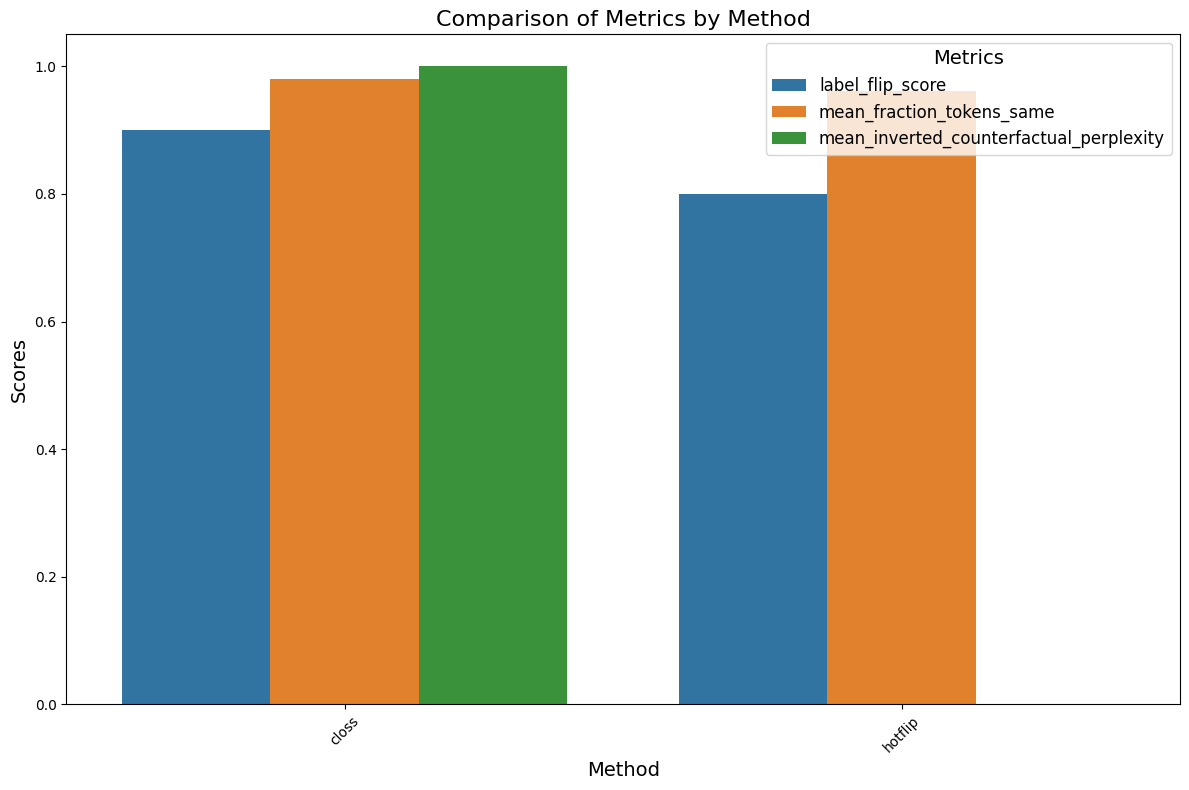

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv("data.csv")

# Melt the DataFrame for seaborn
df_melted = df.melt(id_vars='method_name', var_name='Metric', value_name='Score')

# Create a grouped bar chart using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='method_name', y='Score', hue='Metric', data=df_melted)

# Customize the plot
plt.title('Comparison of Metrics by Method', fontsize=16)
plt.xlabel('Method', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Metrics', fontsize=12, title_fontsize=14)
plt.tight_layout()

plt.show()
